<a href="https://colab.research.google.com/github/NMKUNT/MohanKrishna_INFO5502_Spring2022/blob/main/lab_assignment_04_with_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (02/17/2022, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (15 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?

(3) What is the avergae number of sentences (on average)?

(4) What is the average number of words (on average)?

(5) Visualize the top 50 terms and rank the terms by frquency (remove stop words first: https://gist.github.com/sebleier/554280).

In [ ]:
!unzip /content/sample_data/preprocessed_cases[cases_29404].zip

In [112]:

# Your answer here (code + explanation):
#1
'''
import os
APP_FOLDER = '/content/preprocessed_cases[cases_29404]'
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(APP_FOLDER): # walk goes through each folder and sub folders and stores the directories in dirs, files in files
    #print('Searching in : ',base)
    for directories in dirs: # increasing the count of directories
        totalDir += 1  
    for Files in files: # increasing the count of files
        totalFiles += 1
print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
#print('Total:',(totalDir + totalFiles))
'''

import os
categories = os.listdir("/content/preprocessed_cases[cases_29404]") # returns the directories names in a list 
categoriescount = len(categories)
print('number of categories : ',categoriescount)# lenght of this variable gives us the number of directories 



number of categories :  76


In [152]:
#2

count = 0
filecount=0
for dir in os.listdir('/content/preprocessed_cases[cases_29404]'): # retrieves the directories from the path
    count = 0
    dir_path = r'/content/preprocessed_cases[cases_29404]/{}'.format(dir) # check one directory after the other
    print('directory: ',dir)
    for path in os.scandir(dir_path): # iterates the directory path mentioned
        if path.is_file(): # to note the count of files
            count += 1 
            filecount += 1 
    print('file count:', count)
print('total number of files : ',filecount)


directory:  32
file count: 118
directory:  7
file count: 621
directory:  51
file count: 225
directory:  62
file count: 218
directory:  67
file count: 356
directory:  11
file count: 605
directory:  25
file count: 244
directory:  38
file count: 503
directory:  60
file count: 42
directory:  17
file count: 125
directory:  4
file count: 231
directory:  13
file count: 458
directory:  47
file count: 151
directory:  75
file count: 473
directory:  68
file count: 263
directory:  5
file count: 751
directory:  58
file count: 150
directory:  37
file count: 74
directory:  33
file count: 272
directory:  36
file count: 889
directory:  29
file count: 213
directory:  52
file count: 318
directory:  24
file count: 628
directory:  27
file count: 77
directory:  76
file count: 177
directory:  50
file count: 68
directory:  55
file count: 48
directory:  78
file count: 242
directory:  57
file count: 108
directory:  3
file count: 184
directory:  69
file count: 700
directory:  72
file count: 74
directory:  31
fil

In [153]:
#3

import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
sencount = 0
for i in categories:
    documents = os.listdir("/content/preprocessed_cases[cases_29404]/{}".format((i))) # path of category
    for j in documents:
        f = open("/content/preprocessed_cases[cases_29404]/{}/{}".format(i,j), "r") # path of the file under category
        text = f.read()
        nltk.sent_tokenize(text) # gives the list of sentences
        sencount = len(nltk.sent_tokenize(text)) + sencount #count of all the sentences under all categories
        f.close()
print('average number of  sentences in a file :', sencount/filecount)
print('average number of sentences in a category :', sencount/categoriescount)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
average number of  sentences in a file : 34.54319140253027
average number of sentences in a category : 13364.578947368422


In [199]:
#4
wordcount=0
for i in categories:
    documents = os.listdir("/content/preprocessed_cases[cases_29404]/{}".format((i)))
    for j in documents:
        file = open("/content/preprocessed_cases[cases_29404]/{}/{}".format(i,j), "r")
        read_data = file.read()
        words = read_data.split() # gives the list of words
        wordcount += len(words)

print('average number of words in a file : ' , wordcount/filecount)
print('average number of words in a category :', wordcount/categoriescount)

average number of words in a file :  3634.6446061760303
average number of words in a category : 1406224.8684210526


In [213]:
#5
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import PlaintextCorpusReader
import nltk
nltk.download('stopwords') #list of stop words
stopwords = nltk.corpus.stopwords.words('english') #list of stop words
new_lis = []
for i in categories:
    documents = os.listdir("/content/preprocessed_cases[cases_29404]/{}".format((i)))
    for j in documents:
        f = open("/content/preprocessed_cases[cases_29404]/{}/{}".format(i,j), "r")
        text = f.read()
        #spliting to words to find the words
        words = text.split() # stores the list of words in the text file
        list1 = (new_word.lower() for new_word in words if new_word not in stopwords) # list of words excluding stop words
        for k in list1:
          new_lis.append(k) #list of all the words
distcount = FreqDist(new_lis) # counts the frequency of the words
print(distcount.most_common(50))  # gives top five words



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[('court', 949241), ('district', 398352), ('would', 297441), ('state', 246000), ('also', 223022), ('whether', 193495), ('evidence', 191410), ('may', 182237), ('law', 168041), ('states', 162966), ('federal', 160863), ('must', 159473), ('claim', 154370), ('case', 153364), ('united', 150007), ('trial', 145932), ('claims', 142378), ('judgment', 139964), ('could', 138161), ('one', 137068), ('action', 129849), ('order', 129182), ('first', 123599), ('government', 121202), ('act', 116742), ('defendant', 115075), ('section', 114283), ('two', 111366), ('review', 110406), ('motion', 110067), ('new', 109265), ('issue', 107838), ('decision', 106648), ('rule', 106018), ('plaintiff', 102899), ('time', 101280), ('plaintiffs', 100792), ('filed', 97450), ('public', 95288), ('jury', 93242), ('made', 93135), ('statute', 91063), ('right', 90844), ('defendants', 89316), ('found', 88430), ('

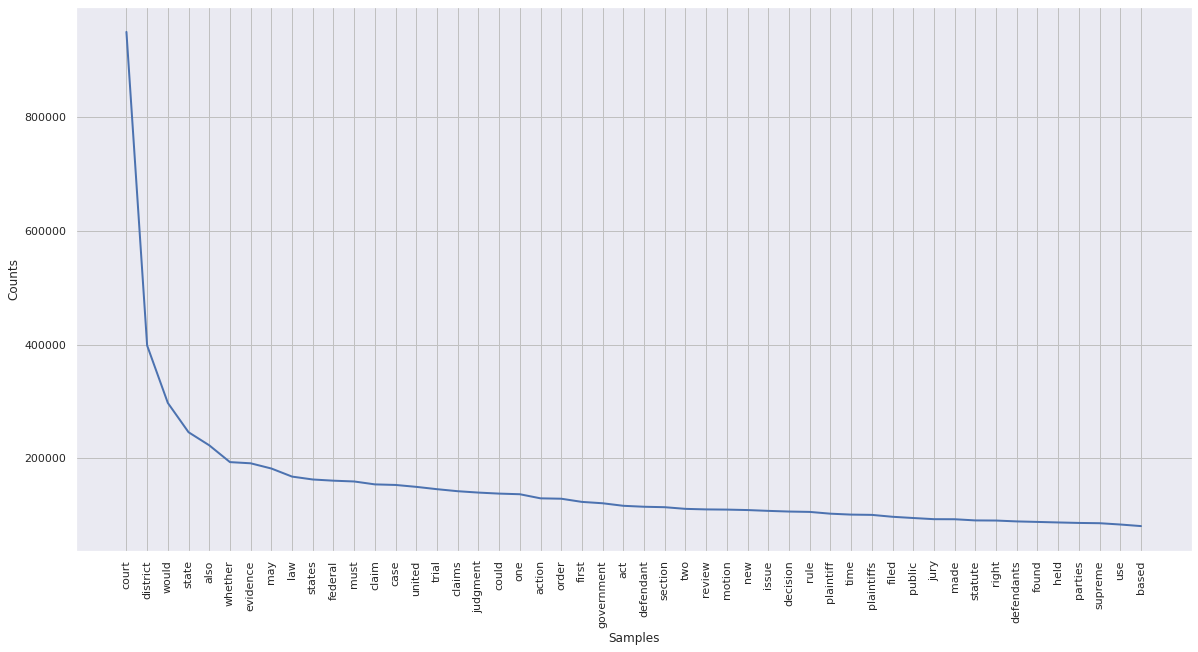

In [216]:
f=distcount.plot(50, cumulative=False)
sns.set(rc={'figure.figsize':(20,10)}) #sets the size of figure

In [217]:
c=0
for x in distcount.most_common(50): # to print rank of the words
    c += 1
    print("Rank",c,x)

Rank 1 ('court', 949241)
Rank 2 ('district', 398352)
Rank 3 ('would', 297441)
Rank 4 ('state', 246000)
Rank 5 ('also', 223022)
Rank 6 ('whether', 193495)
Rank 7 ('evidence', 191410)
Rank 8 ('may', 182237)
Rank 9 ('law', 168041)
Rank 10 ('states', 162966)
Rank 11 ('federal', 160863)
Rank 12 ('must', 159473)
Rank 13 ('claim', 154370)
Rank 14 ('case', 153364)
Rank 15 ('united', 150007)
Rank 16 ('trial', 145932)
Rank 17 ('claims', 142378)
Rank 18 ('judgment', 139964)
Rank 19 ('could', 138161)
Rank 20 ('one', 137068)
Rank 21 ('action', 129849)
Rank 22 ('order', 129182)
Rank 23 ('first', 123599)
Rank 24 ('government', 121202)
Rank 25 ('act', 116742)
Rank 26 ('defendant', 115075)
Rank 27 ('section', 114283)
Rank 28 ('two', 111366)
Rank 29 ('review', 110406)
Rank 30 ('motion', 110067)
Rank 31 ('new', 109265)
Rank 32 ('issue', 107838)
Rank 33 ('decision', 106648)
Rank 34 ('rule', 106018)
Rank 35 ('plaintiff', 102899)
Rank 36 ('time', 101280)
Rank 37 ('plaintiffs', 100792)
Rank 38 ('filed', 9745

Question 2 (20 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

![heatmap.png](attachment:heatmap.png)

In [ ]:
# Your answer here (code + explanation):
#1
import pandas as pan
df = pan.read_csv ('/content/lab-assignment-04-student-performance.csv')

for i in df.columns:  # gets the names the columns
  print('column name: ', i)
  print('number of rows : ',len(df.index))  # gives the number of rows 
  print("number of unique elements : ",df[i].value_counts().shape[0]) # gives unique elements in specific column
  print('frequency of elements:')
  print(df[i].value_counts()) # gives the count of the elements 
  print('  ') 
 


column name:  ge
number of rows :  131
number of unique elements :  2
frequency of elements:
M    72
F    59
Name: ge, dtype: int64
  
column name:  cst
number of rows :  131
number of unique elements :  5
frequency of elements:
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64
  
column name:  tnp
number of rows :  131
number of unique elements :  4
frequency of elements:
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64
  
column name:  twp
number of rows :  131
number of unique elements :  4
frequency of elements:
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64
  
column name:  iap
number of rows :  131
number of unique elements :  4
frequency of elements:
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64
  
column name:  esp
number of rows :  131
number of unique elements :  4
frequency of elements:
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64
  
column name:  arr
number of r

Average    0.450382
Poor       0.343511
Good       0.206107
Name: sh, dtype: float64
Good       27
Poor       45
Average    59
Name: sh, dtype: int64


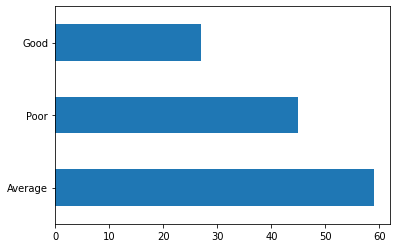

In [77]:
#2
import seaborn as sns
import matplotlib.pyplot as plt
import random
print(df['sh'].value_counts(normalize=True)) # gives the normalized values of the elements in the column
print(df['sh'].value_counts(ascending=True)) # gives the count of the elements
df['sh'].value_counts()[:20].plot(kind='barh') # plots the bar graph elements vs their count
#sns.countplot(df['sh'])


    sh
0    0
1    2
2    4
3    1
4    3
..  ..
125  5
126  5
127  2
128  5
129  4

[130 rows x 1 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


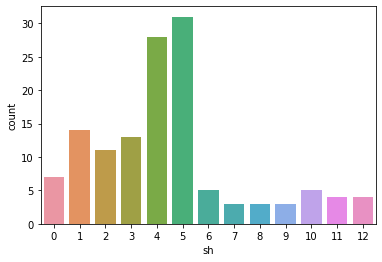

In [149]:
dfalt = pan.DataFrame(df.sh)
for i in dfalt.index: # randomly generating the values for each element in their specifies ranges
    if dfalt['sh'][i] == "Good":
      dfalt['sh'][i] = random.randint(6,12) # randomly assigns the value in the range
    elif dfalt['sh'][i] == "Average":
      dfalt['sh'][i] = random.randint(4,5)
    elif dfalt['sh'][i] == "Poor":
      dfalt['sh'][i] = random.randint(0,3)

sns.countplot(dfalt['sh'])  # plotting the count of randomly generated values 
print(dfalt.head(130))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


          sh    esp
0       Poor  56.99
1       Poor  61.75
2    Average  56.95
3       Poor  45.38
4       Poor  65.76
..       ...    ...
126  Average  31.02
127     Poor  45.84
128  Average  55.93
129  Average  31.45
130  Average  39.38

[131 rows x 2 columns]


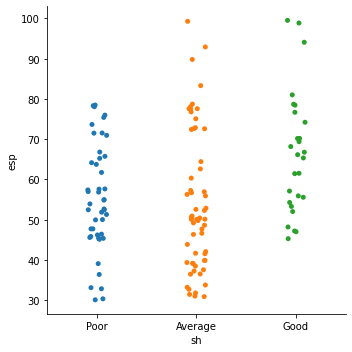

In [165]:
#3
studyh= pan.DataFrame(df.sh)
studyh['esp']=pan.DataFrame(df.esp)
for i in studyh.index:
  if studyh['esp'][i]=='Best':
    studyh['esp'][i]=round(random.uniform(80,100),2) # randomly assigns values in the range (float) rounded to 2 decimal values
  elif studyh['esp'][i]=='Vg':
    studyh['esp'][i]=round(random.uniform(60,79),2)
  elif studyh['esp'][i]=='Good':
    studyh['esp'][i]=round(random.uniform(45,59),2)
  elif studyh['esp'][i]=='Pass':
    studyh['esp'][i]=round(random.uniform(30,44),2)
  elif studyh['esp'][i]=='Fail':
    studyh['esp'][i]=round(random.uniform(0,29),2)

sns.factorplot(x='sh',y='esp', kind = 'strip',data=studyh)
print(studyh)

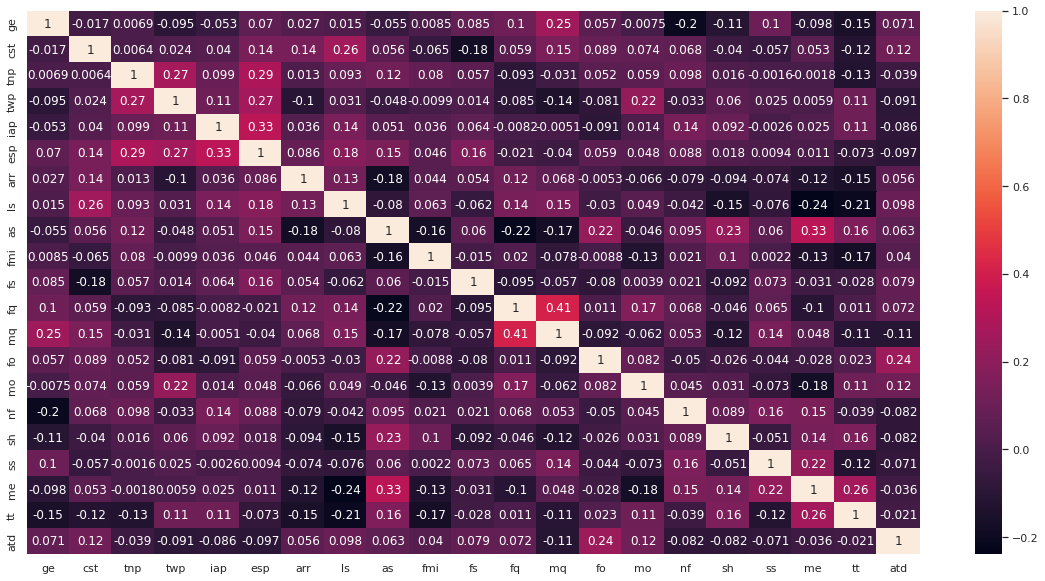

In [215]:
#4 
from sklearn import preprocessing
import seaborn as sns
def encFuc(d_f):
    to_sel_dtype = list(d_f.select_dtypes(include=['category','object']))
    enc_lable = preprocessing.LabelEncoder()
    for i in to_sel_dtype:
        try:
          #ransforming each value to fit the transforation
            d_f[i] = enc_lable.fit_transform(df[i])
        except:
            print('Error encoding '+i)
    return d_f
dfff = df.copy()
dframe = encFuc(dfff)
dframe = dframe.drop('ms', axis = 1)
#dframe = dframe.drop('unnamed: 22', axis = 1)
#taking the dorrelation of data frame
correlation = dframe.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(correlation,annot=True)

plt.show()

Question 3 (15 points). Download a dataset from Kaggle or other sources. Propose three questions that you wanna to know from the dataset, then write python code to conduct EDA analysis to answer the three questions

In [ ]:
# Your three questions:

'''
I have taken a dataset 'FIFA 22 MLS PLAYER RATINGS' from kaggle

1) count of the different overall ratings of the players
2) passing rating of players versus their dribbling rating
3) overall rating of the players versus all other ratings


'''

"\nI have taken a dataset 'FIFA 22 MLS PLAYER RATINGS' from kaggle\n\nPlease list your questions here:\n1) Average rating of the players\n2) rating vs dribbling\n3)passing rate vs pace rating\n\n\n\n"

In [ ]:
!unzip /content/sample_data/archive.zip

Archive:  /content/sample_data/archive.zip
  inflating: FIFA 22 MLS PLAYER RATINGS.csv  


In [169]:
# You code to answer the three questions (Please add comments in the code):
data = pan.read_csv ('/content/FIFA 22 MLS PLAYER RATINGS.csv')
average = data['OVR'].mean() #gives the average overall rating of players
print ("average of over all ratings: ",average)
print("count of over all rating normalized")
print(data['OVR'].value_counts(normalize=True)) 
print("count of each rating in ascending")
print(data['OVR'].value_counts(ascending=True))


average of over all ratings:  63.806089743589745
count of over all rating normalized
68    0.107372
66    0.088141
69    0.081731
67    0.075321
65    0.073718
64    0.072115
71    0.068910
70    0.052885
62    0.049679
61    0.043269
63    0.041667
57    0.035256
58    0.033654
56    0.033654
54    0.032051
59    0.027244
60    0.019231
53    0.014423
55    0.011218
52    0.011218
51    0.009615
49    0.008013
50    0.004808
48    0.003205
47    0.001603
Name: OVR, dtype: float64
count of each rating in ascending
47     1
48     2
50     3
49     5
51     6
52     7
55     7
53     9
60    12
59    17
54    20
58    21
56    21
57    22
63    26
61    27
62    31
70    33
71    43
64    45
65    46
67    47
69    51
66    55
68    67
Name: OVR, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


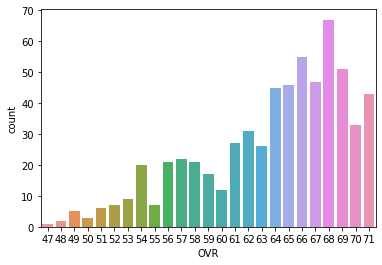

In [172]:
#1 
sns.countplot(data['OVR']);# count of each rating

we can see that many players have good rating.
we can also see that average rating is near to top rating

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


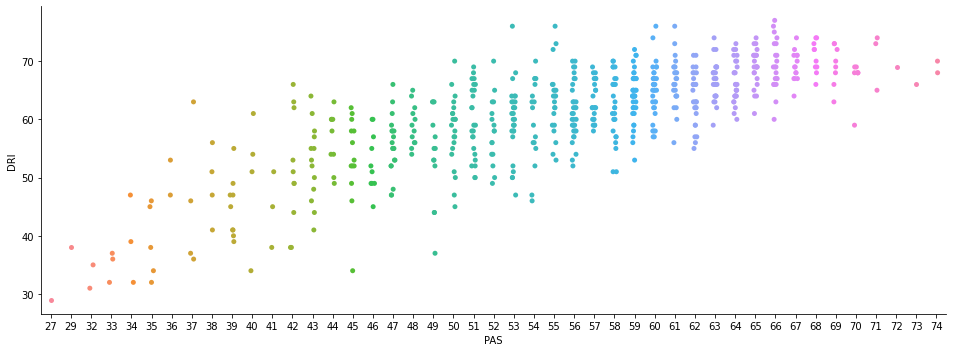

In [197]:
#2
h=sns.factorplot(x='PAS',y='DRI', kind = 'strip',data=data) #passing rating vs dribbling rating
h.fig.set_figwidth(15) # sets the x axis width

dribbling rating and passing rating are almost similar for most of the players

In [185]:
#3
data1 = data[['OVR','PAC','SHO','PAS','DRI','DEF','PHY']] # created a new dataframe only with ratings
data1.rename(columns={'OVR': 'overall rating', 'PAC': 'pace rating','SHO':'Shooting rating','PAS':'Passing rating','DRI': 'Dribbling rating','DEF':'Defence rating','PHY':'Physicality rating'}, inplace=True)            
data1                                           

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,overall rating,pace rating,Shooting rating,Passing rating,Dribbling rating,Defence rating,Physicality rating
0,65,64,48,61,62,63,68
1,66,68,32,54,62,65,73
2,62,62,61,52,58,29,72
3,65,80,27,51,50,63,73
4,53,54,52,51,59,25,54
...,...,...,...,...,...,...,...
619,60,74,37,54,63,54,66
620,65,79,63,56,69,41,56
621,67,62,68,66,66,34,70
622,68,48,55,65,67,67,66


In [188]:
datam = data1.melt('overall rating', var_name='cols', value_name='vals') # this creates a new data frame with measurement columns

In [189]:
datam

,overall rating,cols,vals
0,65,pace rating,64
1,66,pace rating,68
2,62,pace rating,62
3,65,pace rating,80
4,53,pace rating,54
...,...,...,...
3739,60,Physicality rating,66
3740,65,Physicality rating,56
3741,67,Physicality rating,70
3742,68,Physicality rating,66


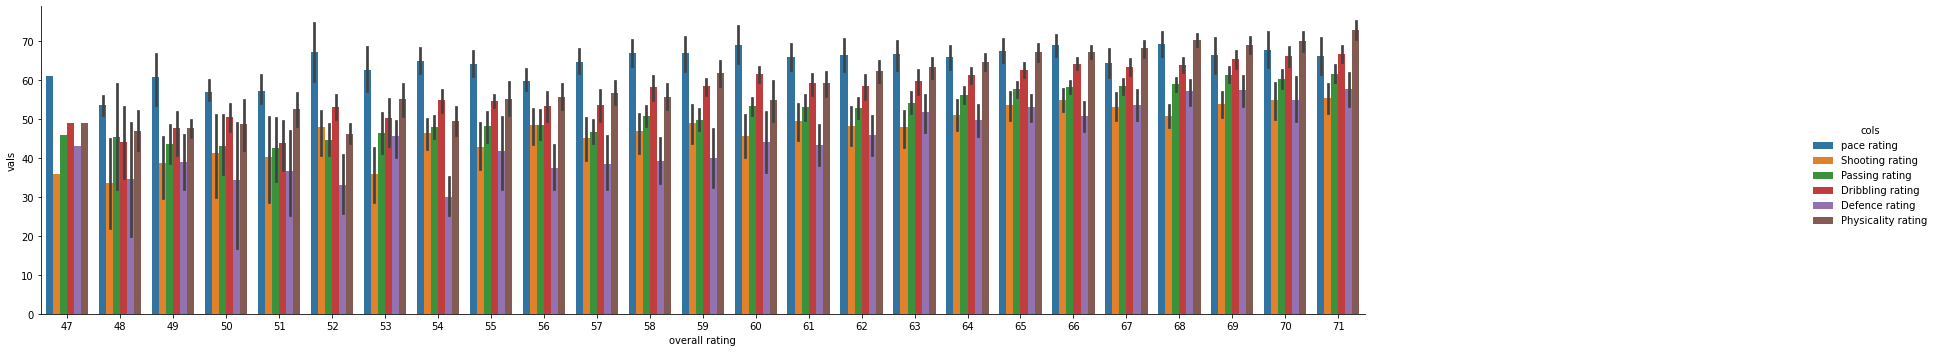

In [193]:
g=sns.catplot(x="overall rating", y="vals", hue='cols',kind = 'bar', data=datam) #plots the bar graph, taking data from our melt dataframe
g.fig.set_figwidth(30) # sets the x axis width

in the above graph we can see that, when the overall rating of the players is high, there is very less variation in other ratings, but for the players with low overall rating, we can see that there is huge variation in some of the ratings.

